In [23]:
import pandas as pd

# Load CSV with correct separator
df = pd.read_csv('household_power_consumption.txt', sep=';')

# Convert all columns to numeric except 'Date' and 'Time'
for col in df.columns:
    if col not in ['Date', 'Time']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Check data types
print(df.dtypes)


C:\Users\Sriraman\AppData\Local\Temp\ipykernel_21208\402093455.py:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt', sep=';')


Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [24]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [25]:
df.dropna(inplace=True)


In [26]:
df.shape

(2049280, 9)

In [27]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
# Store outlier summary
outlier_summary = {}

# Loop through numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    outlier_summary[col] = outlier_count

# Display outlier count for each column
print("Outliers detected in each column:\n")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")


Outliers detected in each column:

Global_active_power: 94907 outliers
Global_reactive_power: 40420 outliers
Voltage: 51067 outliers
Global_intensity: 100961 outliers
Sub_metering_1: 169105 outliers
Sub_metering_2: 77151 outliers
Sub_metering_3: 0 outliers


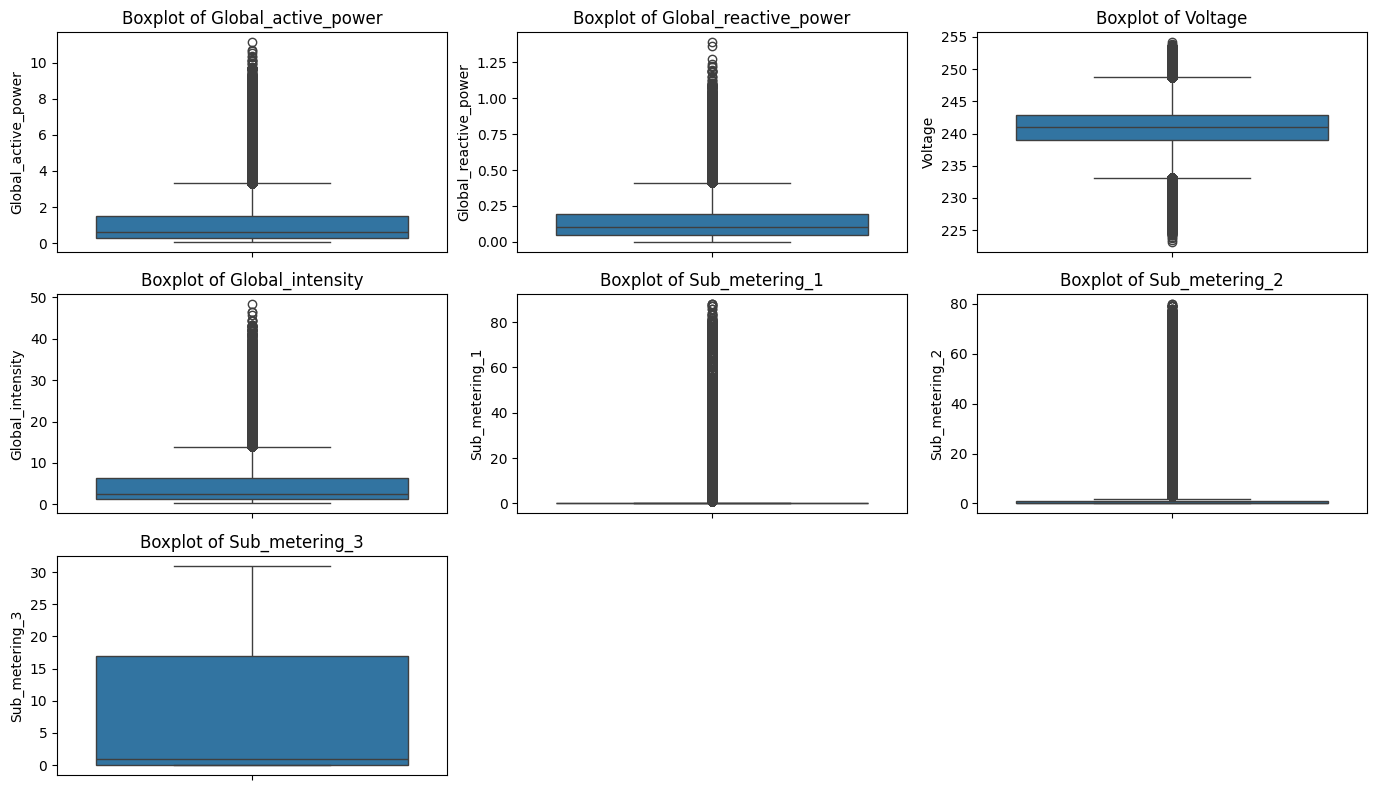

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numeric columns
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [30]:
# Capping outliers for all numeric columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Clip values outside the bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers have been capped using the IQR method.")


Outliers have been capped using the IQR method.


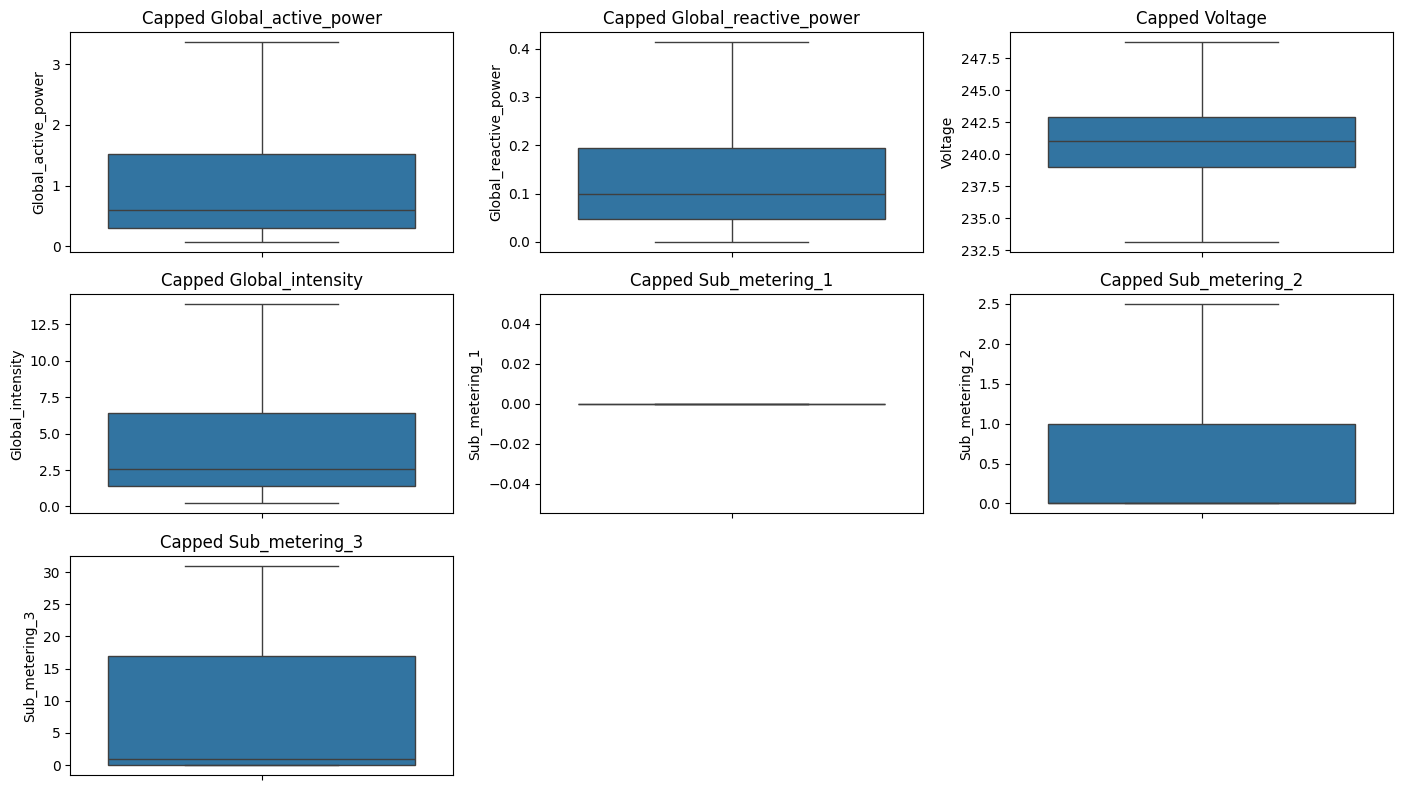

In [31]:
# Visualize after capping
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Capped {col}')
plt.tight_layout()
plt.show()


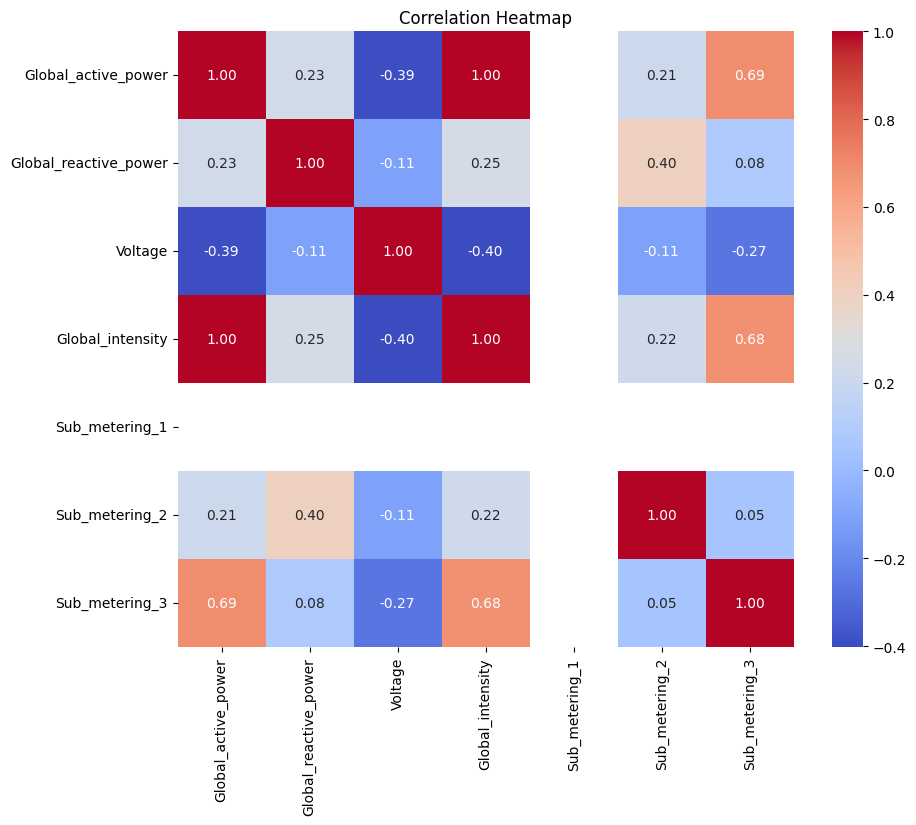

In [ ]:
# Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


In [11]:
# Set target and features
target = 'Global_active_power'
features = ['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

X = df[features]
y = df[target]


In [12]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and test sets created:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


Training and test sets created:
X_train: (1639424, 6), X_test: (409856, 6)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
# Predict on test data
y_pred = lr_model.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Linear Regression Performance:")
print(f"R² Score       : {r2:.4f}")
print(f"RMSE           : {rmse:.4f}")
print(f"MAE            : {mae:.4f}")


Linear Regression Performance:
R² Score       : 0.9982
RMSE           : 0.0393
MAE            : 0.0246


In [15]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model (you can tune n_neighbors later)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
# Predict on the test set
y_knn_pred = knn_model.predict(X_test_scaled)
# Evaluation metrics
r2_knn = r2_score(y_test, y_knn_pred)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_knn_pred))
mae_knn = mean_absolute_error(y_test, y_knn_pred)

print(f"KNN Regression Performance:")
print(f"R² Score       : {r2_knn:.4f}")
print(f"RMSE           : {rmse_knn:.4f}")
print(f"MAE            : {mae_knn:.4f}")


KNN Regression Performance:
R² Score       : 0.9983
RMSE           : 0.0382
MAE            : 0.0214


In [16]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
# Predict on the test set
y_dt_pred = dt_model.predict(X_test_scaled)
# Evaluation metrics
r2_dt = r2_score(y_test, y_dt_pred)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_dt_pred))
mae_dt = mean_absolute_error(y_test, y_dt_pred)

print(f"Decision Tree Regression Performance:")
print(f"R² Score       : {r2_dt:.4f}")
print(f"RMSE           : {rmse_dt:.4f}")
print(f"MAE            : {mae_dt:.4f}")


Decision Tree Regression Performance:
R² Score       : 0.9975
RMSE           : 0.0460
MAE            : 0.0229


In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=5, random_state=42)
rf_model.fit(X_train_scaled, y_train)
# Predict on the test set
y_rf_pred = rf_model.predict(X_test_scaled)
# Evaluation metrics
r2_rf = r2_score(y_test, y_rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_rf_pred))
mae_rf = mean_absolute_error(y_test, y_rf_pred)

print(f"Random Forest Regression Performance:")
print(f"R² Score       : {r2_rf:.4f}")
print(f"RMSE           : {rmse_rf:.4f}")
print(f"MAE            : {mae_rf:.4f}")


Random Forest Regression Performance:
R² Score       : 0.9983
RMSE           : 0.0375
MAE            : 0.0201


In [19]:
from sklearn.linear_model import Ridge

# Initialize the model
ridge_model = Ridge(alpha=1.0)  # You can tune alpha
ridge_model.fit(X_train_scaled, y_train)
# Predict on the test set
y_ridge_pred = ridge_model.predict(X_test_scaled)
# Evaluation metrics
r2_ridge = r2_score(y_test, y_ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_ridge_pred))
mae_ridge = mean_absolute_error(y_test, y_ridge_pred)

print(f"Ridge Regression Performance:")
print(f"R² Score       : {r2_ridge:.4f}")
print(f"RMSE           : {rmse_ridge:.4f}")
print(f"MAE            : {mae_ridge:.4f}")


Ridge Regression Performance:
R² Score       : 0.9982
RMSE           : 0.0393
MAE            : 0.0246
